In [1]:
import numpy as np #import linear-algebra
import pandas as pd #import data analysis

#import visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler

#enable printing all outputs 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_creditcard = pd.read_csv('creditcard.csv')

In [3]:
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


There are 28 features from V1 to V28. All the features have been scaled to protect the confidentiality of the data.
There is a Time field which depicts the time of the transaction.
Amount field is the transaction amount.
Class is the target variable which could be 0 for a non-fradulent transaction and 1 for a fradulent transaction.

In [4]:
df_creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


There are 284,807 transactions. Mean transaction amount is 88 USD. The IQR of the transaction looks normal. 

Check for null values.

In [5]:
df_creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values. The dataset looks clean.

In [6]:
# let's look at how many fraud transactions are there
len(df_creditcard[df_creditcard['Class'] == 1])

492

Checking imbalance in the dataset. An imbalanced dataset will impact the performance of our model. While the model may perform well (overfit) during the training phase, its performance would drop on testing data. 
We will perform Random Resamplings on an imbalanced dataset so that the model is trained on a balanced dataset where in minorty & majortiy class are in an equal (or somewhat) ratios.

In [7]:
ratio_of_fraudulent_transactions = len(df_creditcard[df_creditcard['Class'] == 1])/len(df_creditcard)*100
ratio_of_nonfraudulent_transactions = len(df_creditcard[df_creditcard['Class'] == 0])/len(df_creditcard)*100
print('fraudulent transactions in the dataset: {}%'.format(round(ratio_of_fraudulent_transactions,3)))
print('non-fraudulent transactions in the dataset: {}%'.format(round(ratio_of_nonfraudulent_transactions,3)))

fraudulent transactions in the dataset: 0.173%
non-fraudulent transactions in the dataset: 99.827%


There are 492 fraud transactions out of 284k transactions i.e. just 0.173%. This indicates that the dataset is highly imbalanced. Our ML algorithm should work on a balanced dataset so not to overfit the algo on a train data. We will decide later on metrics to evaluate the model. Suggested metric is: Area Under the Precision-Recall Curve (AUPRC).
For instance, selecting Accuracy metric will be a bad choice as the algo will be predicting right most of the times due to highly imbalanced dataset.

V1 to V28 features have already been scaled as per the team which captured these data. The only other 2 features which are not scaled are Time & Amount. 
Let's analyze both these features' distribution.

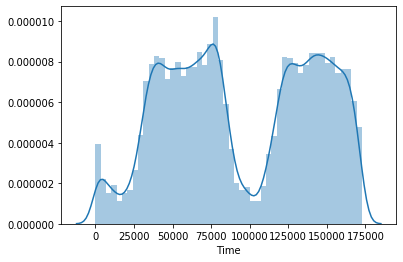

In [8]:
sns.distplot(df_creditcard['Time'], kde=True);

Time feature: Per the dataset description it is the time elapsed in seconds between each transaction and the 1st transaction. The data are captured over 2 days. There are two time periods during which most transactions occurred. One between 2500 to 75000 seconds and other between 125000 to 160000 seconds.

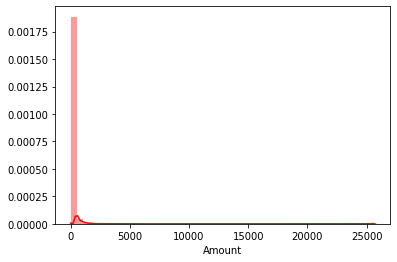

In [9]:
sns.distplot(df_creditcard['Amount'], kde=True, color='r');

Most of the transactions were valued between 0 to approx 100 USD. It is a long tail (skewed) depicting some transactions of very high value (which might or might not be fraudulent).
A quick check to see transaction amounts of fraudulent transactions shows that a fraudulent transaction could be of any amount - even as small as less than a dollar. 

In [10]:
print('Max transaction amount of a non-fraudulent transaction = {}'.format(df_creditcard[df_creditcard['Class']==0]['Amount'].max()))
print('Max transaction amount of a fraudulent transaction = {}'.format(df_creditcard[df_creditcard['Class']==1]['Amount'].max()))

Max transaction amount of a non-fraudulent transaction = 25691.16
Max transaction amount of a fraudulent transaction = 2125.87


Data Preprocessing:

1. Scaling: Time & Amount features need to be scaled. Other features V1 to V28 are already scaled.   
   After doing feature scaling, we will analyze the correlations between the features.


2. Train-Test data split: As it is a highly imbalanced dataset, we will use Random UnderSampling & Random OverSampling to make sure the class distribution are balanced (i.e. minority class are in good proportion with the majority class).

    Reference: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

Feature Scaling:

Reference: https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

#### Scaling 

1. We know that features V1 to V28 are already scaled using PCA transformation (Dimensionality Reduction technique) by provider of this dataset
2. Only Time & Amount features need to be scaled
3. Let's create 2 new features depicting scaled_time & scaled_amount. Also, drop Time & Amount field as those would not be required for further analysis and model training.
4. Both Time & Amount are not Gaussian (not normally distributed). Especially Amount feature has few outliers. For these reasons, out of many scaling techniques, we will opt for RobustScaler as this is not sensitive to outliers.

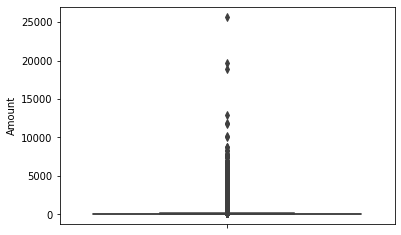

In [11]:
sns.boxplot(y='Amount', data=df_creditcard);

In [12]:
rob_scaler = RobustScaler()

df_creditcard['scaled_time'] = rob_scaler.fit_transform(df_creditcard['Time'].values.reshape(-1,1))
df_creditcard['scaled_amount'] = rob_scaler.fit_transform(df_creditcard['Amount'].values.reshape(-1,1))

In [13]:
df_creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_time,scaled_amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727,0.118914,0.927124
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,0.557903,3.495006
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,-0.994983,-0.307413
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,-0.358210,-0.229162
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,0.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,0.641790,0.770838
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,1.035022,358.683155


Observations: 
1. RobustScaler scaled scaled_time & scaled_amount features to inter-quartile range
2. The 50 percentile is centered to 0
3. The standard deviation suggests it is not prone to the outliers

In [14]:
# drop original columns as those are scaled
df_creditcard.drop(columns=['Time','Amount'], axis=1,inplace=True)

# reposition the new scaled columns for better view of the sampled data
scaled_time = df_creditcard['scaled_time']
scaled_amount = df_creditcard['scaled_amount']

df_creditcard.drop(columns=['scaled_time','scaled_amount'], axis=1, inplace=True)
df_creditcard.insert(0, 'scaled_time', scaled_time)
df_creditcard.insert(1, 'scaled_amount', scaled_amount)

In [15]:
df_creditcard.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Random UnderSampling to analyze the correlations

##### Feature correlation
1. If we analyze the correlation between the features on an imbalanced dataset, it might be misleading. In fact, there is no clear correlation seen among the features when data are imbalanced.
2. To counter this challenge, we will need to bring the dataset to a balanced ratio of minority and majority classes. 
3. In Random UnderSampling process, you randomly select instances of majority class to match the number with minority class instances. Put it differently, we actually randomly delete majority class instances to match with minority class instances.
4. We will analyze correlation on a balanced data to find strong relationships among features and target variable.


###### Correlation on Unbalanced dataset 

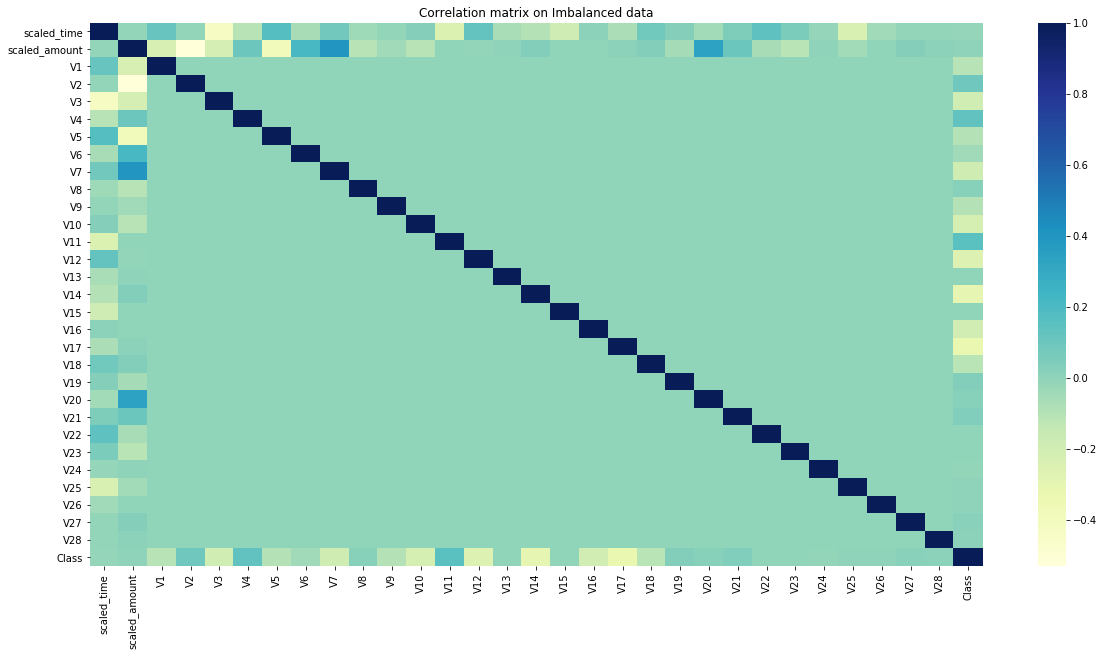

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_creditcard.corr(),cmap='YlGnBu', annot_kws={'size':10}, ax=ax)
ax.set_title('Correlation matrix on Imbalanced data')
plt.show();

###### Steps for Random UnderSampling (Manually)
1. Determine the instances in minority & majority classes: we know that there are 492 "fraud" transactions.
2. Bring down instances for majority class "non-fraud" transactions to match with "fraud" transactions i.e. randomly select 492 instances of non-fraud transactions.
3. Once we have a subset of data in 50:50 ratio, we could carry out analysis on it.

In [17]:
# shuffle the data before we start taking a sample

df_creditcard = df_creditcard.sample(frac=1) # select 100% of the dataframe randomly. not using random_state to make it truly a random process & not just a pseudo random generator 

fraud_transactions = df_creditcard[df_creditcard['Class']==1] #select all fraud txns
non_fraud_transactions = df_creditcard.loc[df_creditcard['Class']==0][:492] #select 492 non-fraud txns to match with the fraud txns

#concate the fraud & non-fraud transactions to produce a new dataframe with 50:50 ratio
df_normal_distributed = pd.concat([fraud_transactions, non_fraud_transactions])

#shuffle the deck
df_rand_undersample = df_normal_distributed.sample(frac=1)

In [18]:
df_rand_undersample.shape

(984, 31)

Class distribution on the sample

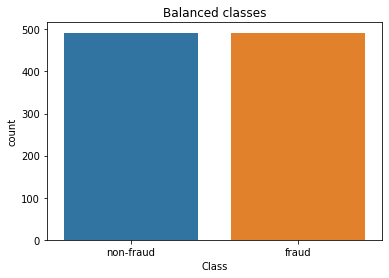

In [19]:
fig,ax=plt.subplots()
sns.countplot(x='Class', data=df_rand_undersample,ax=ax)
ax.set_xticklabels(['non-fraud','fraud'])
plt.title('Balanced classes');

In [20]:
print('Ratio of non-fraud transactions in the dataset {}'.format(len(df_rand_undersample[df_rand_undersample['Class']==0])/len(df_rand_undersample)))
print('Ratio of fraud transactions in the dataset {}'.format(len(df_rand_undersample[df_rand_undersample['Class']==1])/len(df_rand_undersample)))

Ratio of non-fraud transactions in the dataset 0.5
Ratio of fraud transactions in the dataset 0.5


###### Correlation on the sample data

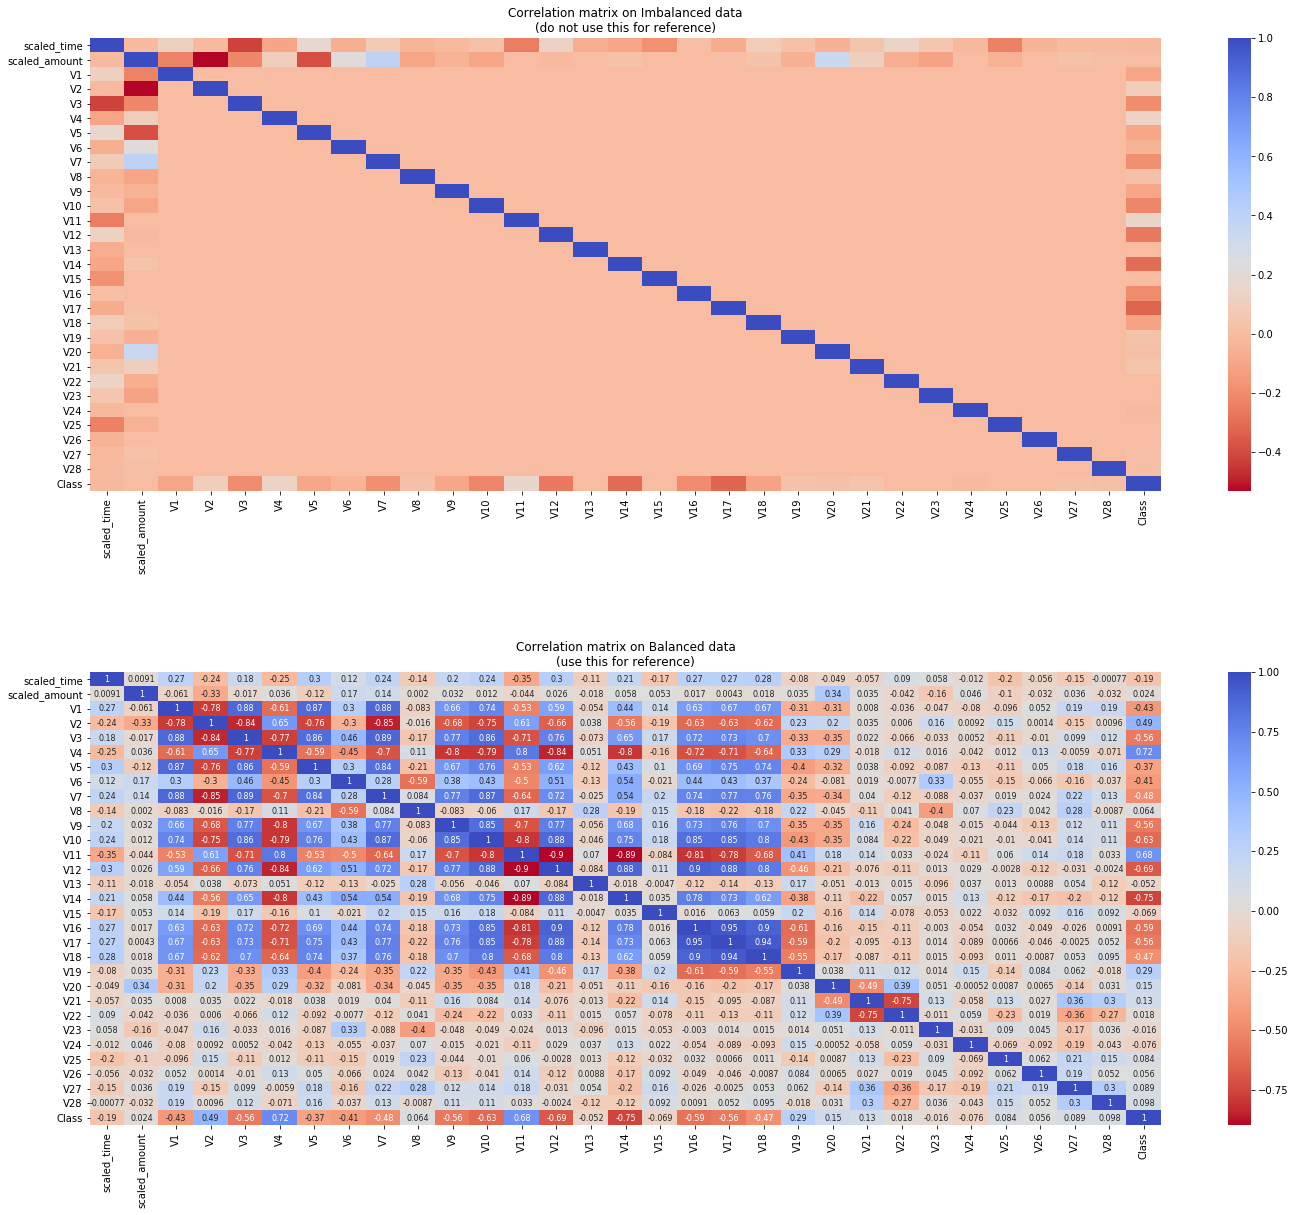

In [21]:
fig,ax = plt.subplots(2, 1, figsize=(24,20))
fig.subplots_adjust(hspace=0.4)
# sns.set(context='talk')

sns.heatmap(df_creditcard.corr(),cmap='coolwarm_r', annot_kws={'size':20}, ax=ax[0])
ax[0].set_title('Correlation matrix on Imbalanced data\n(do not use this for reference)')


sns.heatmap(df_rand_undersample.corr(),cmap='coolwarm_r', annot_kws={'size':8}, ax = ax[1], annot=True)
ax[1].set_title('Correlation matrix on Balanced data\n(use this for reference)');

# plt.close()

###### Correlation relationships between categorical features (the predictors) and target (class)

1. Negative correlations

V14, V12, V10, V16, V17 - have strong negative correlations with the target variable. Lower the values of these predictors higher the chances that the transaction is fraudulent.

2. Positive correlations

V4, V11, V2, V19 - have strong positive correlations witht the target variable. Higher the values of these predictors higher the chances that the transaction is fraudulent.

Let's plot these features on a boxplot to understand the distribution of these features. We might also spot some outliers.

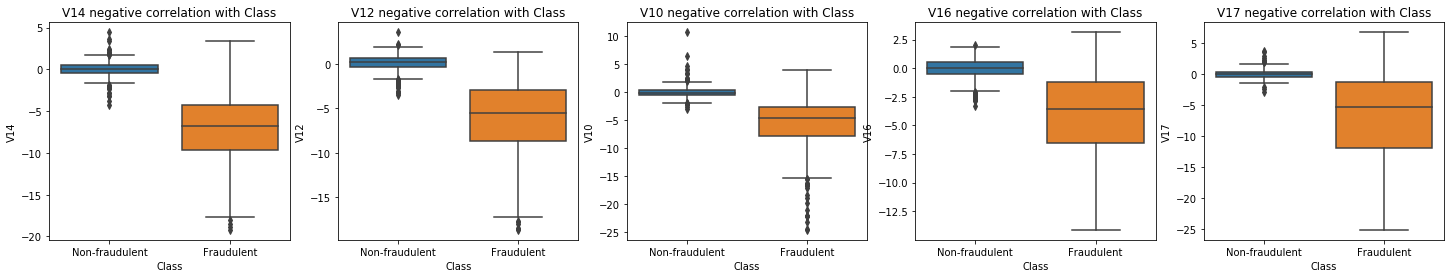

In [22]:
#Negative correlations - lower the values of these features higher the chances of a fraudulent transaction
fix, axes = plt.subplots(1,5, figsize=(25,4), sharey=False)
sns.boxplot(y='V14', x='Class', data=df_rand_undersample, ax = axes[0])
axes[0].set_title('V14 negative correlation with Class')
axes[0].set_xticklabels(['Non-fraudulent','Fraudulent'])

sns.boxplot(y='V12', x='Class', data=df_rand_undersample, ax = axes[1])
axes[1].set_title('V12 negative correlation with Class')
axes[1].set_xticklabels(['Non-fraudulent','Fraudulent'])

sns.boxplot(y='V10', x='Class', data=df_rand_undersample, ax = axes[2])
axes[2].set_title('V10 negative correlation with Class')
axes[2].set_xticklabels(['Non-fraudulent','Fraudulent'])

sns.boxplot(y='V16', x='Class', data=df_rand_undersample, ax = axes[3])
axes[3].set_title('V16 negative correlation with Class')
axes[3].set_xticklabels(['Non-fraudulent','Fraudulent'])

sns.boxplot(y='V17', x='Class', data=df_rand_undersample, ax = axes[4])
axes[4].set_title('V17 negative correlation with Class')
axes[4].set_xticklabels(['Non-fraudulent','Fraudulent']);

Observations:
1. When there are non-fraudulent transactions the distribution of the features largely (per Inter-Quartile Range) fall around 0.
2. When there are fraudulent transactions the distribution of the features are largely negative with a median of -5 
3. For feature 10, some outliers are clearly spotted in both the classes - this might affect training the model

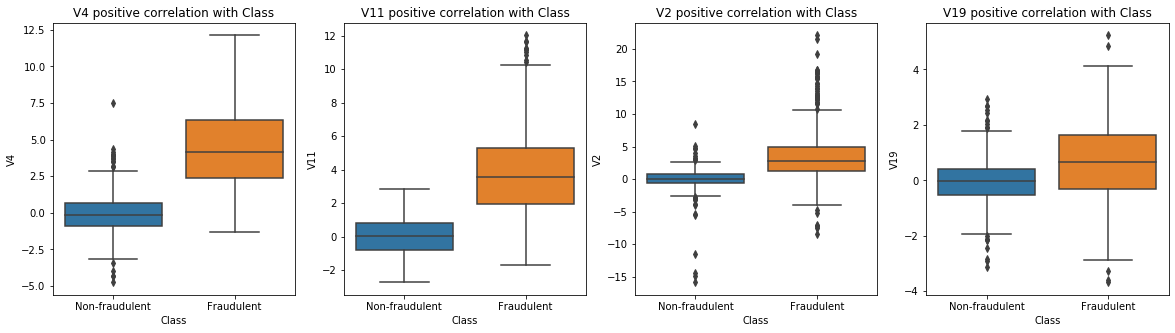

In [23]:
#Positive correlations with fraudulent transactions - higher the values of these features higher the chances of a fraudulent transaction
fig, axes = plt.subplots(1, 4, figsize=(20,5))

sns.boxplot(y='V4', x='Class', data=df_rand_undersample, ax=axes[0])
axes[0].set_title('V4 positive correlation with Class')
axes[0].set_xticklabels(['Non-fraudulent','Fraudulent'])

sns.boxplot(y='V11', x='Class', data=df_rand_undersample, ax=axes[1])
axes[1].set_title('V11 positive correlation with Class')
axes[1].set_xticklabels(['Non-fraudulent','Fraudulent'])

sns.boxplot(y='V2', x='Class', data=df_rand_undersample, ax=axes[2])
axes[2].set_title('V2 positive correlation with Class')
axes[2].set_xticklabels(['Non-fraudulent','Fraudulent'])

sns.boxplot(y='V19', x='Class', data=df_rand_undersample, ax=axes[3])
axes[3].set_title('V19 positive correlation with Class')
axes[3].set_xticklabels(['Non-fraudulent','Fraudulent']);

Observations:
1. When there are fraudulent transactions the distribution of these features largely fall in positive range
2. There quite a few outliers. Especially V2 & V19, in which cases the outliers are observed in both Class Negative and Positive.

##### Anomaly Detection

Using BoxPlot, we spotted outliers in features. Outliers if not taken care of affects the performance of the model. Our main goal here is to remove "extreme outliers". There are strategies to remove outliers. We will use <b>Inter-Quartile Range cut-off</b> strategy. In this strategy, we will remove all the observations which exceed a certain upper & lower cut-off. The cut-off is decided based on IQR multiplied by a factor (i.e. 25 percentile * factor for lower threshold & 75 percentile * factor for upper threshold) . Most common factor used is 1.5. 
<b>Trade-off:</b> If higher factor is used more observations will be included in our analysis causing model to overfit, if factor is too low we will remove too many observations which will cause information loss.
<b>Ref:</b> <href>https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/</href><br>

1. A quick look at the distribution of the features (whether it is Gaussian or non-Gaussian)
1. Determine the cut-off limits for each selected feature
2. Remove the observations supassing the cut-off limits
3. Use BoxPlot to view the distributions of the features to make sure the outliers are removed

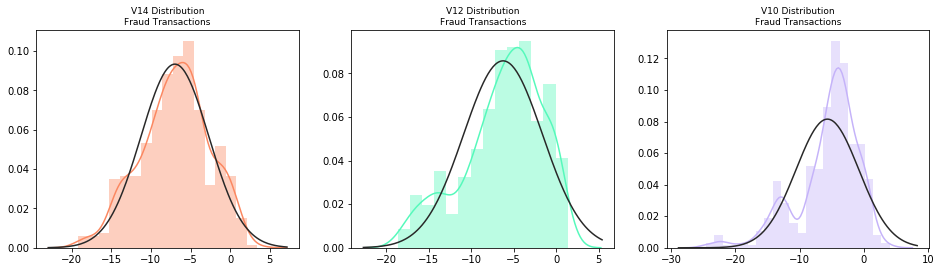

In [24]:
from scipy.stats import norm
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

V14_Fraud_Dist = df_rand_undersample[df_rand_undersample['Class']==1]['V14'].values
sns.distplot(V14_Fraud_Dist, ax = ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution\nFraud Transactions', fontsize=9)

V12_Fraud_Dist = df_rand_undersample[df_rand_undersample['Class']==1]['V12'].values
sns.distplot(V12_Fraud_Dist, ax = ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution\nFraud Transactions', fontsize=9)


V10_Fraud_Dist = df_rand_undersample[df_rand_undersample['Class']==1]['V10'].values
sns.distplot(V10_Fraud_Dist, ax = ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution\nFraud Transactions', fontsize=9);

In [25]:
df_rand_undersample.shape

(984, 31)

In [26]:
# remove the extreme outliers based on the IQR cut-off

mult_factor = 1.5
# V14
print('****'*5 + 'V14 start' + '****'*5)
V14_values = df_rand_undersample[df_rand_undersample['Class']==1]['V14'].values
perc25, perc75 = np.percentile(V14_values, [25,75])
print('Quartile 25: {} | Quartile 75: {}'.format(perc25, perc75))
iqr = perc75-perc25
print('IQR: {}'.format(iqr))
cut_off = iqr * mult_factor
print('cut off (IQR*{1}): {0}'.format(cut_off, mult_factor))
V14_lower_threshold = perc25-cut_off
V14_upper_threshold = perc75+cut_off
print('lower threshold: {} | upper threshold: {}'.format(V14_lower_threshold, V14_upper_threshold))

V14_extremes = [x for x in V14_values if ((x<V14_lower_threshold) | (x>V14_upper_threshold))]
print(len(V14_extremes))

df_rand_undersample = df_rand_undersample.drop(df_rand_undersample[(df_rand_undersample['V14'] < V14_lower_threshold) | (df_rand_undersample['V14'] > V14_upper_threshold)].index)

print('Number of instances after outliers removal: {}'.format(len(df_rand_undersample)))
print('****'*5 + 'V14 end' + '****'*5)

# V12
print('****'*5 + 'V12 start' + '****'*5)
V12_values = df_rand_undersample[df_rand_undersample['Class']==1]['V12'].values
perc25, perc75 = np.percentile(V12_values, [25,75])
print('Quartile 25: {} | Quartile 75: {}'.format(perc25, perc75))
iqr = perc75-perc25
print('IQR: {}'.format(iqr))
cut_off = iqr * mult_factor
print('cut off (IQR*{1}): {0}'.format(cut_off, mult_factor))
V12_lower_threshold = perc25-cut_off
V12_upper_threshold = perc75+cut_off
print('lower threshold: {} | upper threshold: {}'.format(V12_lower_threshold, V12_upper_threshold))

V12_extremes = [x for x in V12_values if ((x<V12_lower_threshold) | (x>V12_upper_threshold))]
print(len(V12_extremes))

df_rand_undersample = df_rand_undersample.drop(df_rand_undersample[(df_rand_undersample['V12'] < V12_lower_threshold) | (df_rand_undersample['V12'] > V12_upper_threshold)].index)

print('Number of instances after outliers removal: {}'.format(len(df_rand_undersample)))
print('****'*5 + 'V12 end' + '****'*5)


# V10
print('****'*5 + 'V10 start' + '****'*5)
V10_values = df_rand_undersample[df_rand_undersample['Class']==1]['V10'].values
perc25, perc75 = np.percentile(V10_values, [25,75])
print('Quartile 25: {} | Quartile 75: {}'.format(perc25, perc75))
iqr = perc75-perc25
print('IQR: {}'.format(iqr))
cut_off = iqr * mult_factor
print('cut off (IQR*{1}): {0}'.format(cut_off, mult_factor))
V10_lower_threshold = perc25-cut_off
V10_upper_threshold = perc75+cut_off
print('lower threshold: {} | upper threshold: {}'.format(V10_lower_threshold, V10_upper_threshold))

V10_extremes = [x for x in V10_values if ((x<V10_lower_threshold) | (x>V10_upper_threshold))]
print(len(V10_extremes))

df_rand_undersample = df_rand_undersample.drop(df_rand_undersample[(df_rand_undersample['V10'] < V10_lower_threshold) | (df_rand_undersample['V10'] > V10_upper_threshold)].index)

print('Number of instances after outliers removal: {}'.format(len(df_rand_undersample)))
print('****'*5 + 'V10 end' + '****'*5)

********************V14 start********************
Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
IQR: 5.409902115485519
cut off (IQR*1.5): 8.114853173228278
lower threshold: -17.807576138200663 | upper threshold: 3.8320323237414122
4
Number of instances after outliers removal: 979
********************V14 end********************
********************V12 start********************
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
IQR: 5.780002635714835
cut off (IQR*1.5): 8.670003953572252
lower threshold: -17.3430371579634 | upper threshold: 5.776973384895937
4
Number of instances after outliers removal: 975
********************V12 end********************
********************V10 start********************
Quartile 25: -7.466658535821848 | Quartile 75: -2.5118611381562523
IQR: 4.954797397665596
cut off (IQR*1.5): 7.4321960964983935
lower threshold: -14.89885463232024 | upper threshold: 4.920334958342141
27
Number of instances after outliers removal: 946
****

Note: The number of outlier instances removed might not be equal to number of outliers detected for following reasons:
1. The same record might have outliers in more than one features
2. When removing instances we are removing from fraud as well non-fraud transactions i.e. at a feature level if the observation is breaching the threshold then we are removing. In multiple runs it is noted that in feature V10 some outliers were present in non-fraud transactions (Class = 0).

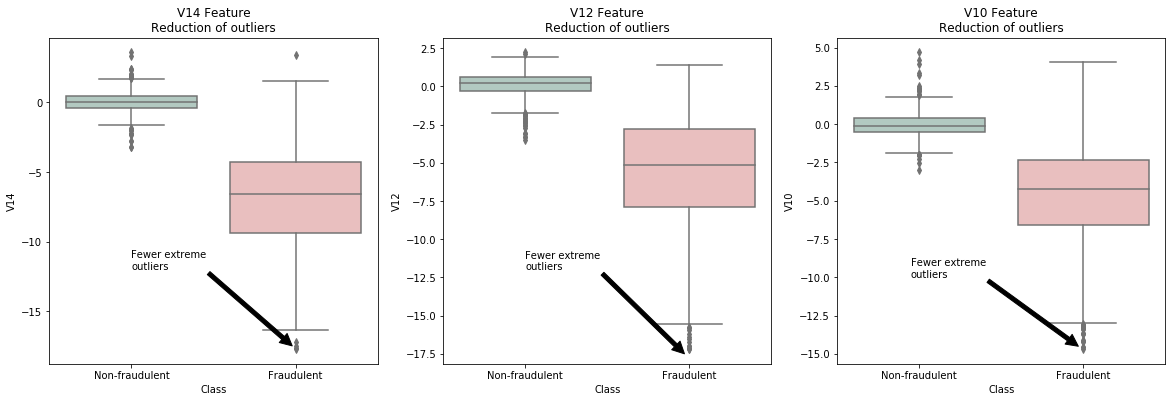

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

colors = ['#aecdc2', '#f0b8b8']
sns.boxplot(y='V14', x='Class', data=df_rand_undersample, ax = ax1, palette=colors)
ax1.set_title('V14 Feature\nReduction of outliers')
ax1.set_xticklabels(['Non-fraudulent','Fraudulent'])
ax1.annotate('Fewer extreme\noutliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=10)

sns.boxplot(y='V12', x='Class', data=df_rand_undersample, ax = ax2, palette=colors)
ax2.set_title('V12 Feature\nReduction of outliers')
ax2.set_xticklabels(['Non-fraudulent','Fraudulent'])
ax2.annotate('Fewer extreme\noutliers', xy=(0.97, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=10)

sns.boxplot(y='V10', x='Class', data=df_rand_undersample, ax = ax3, palette=colors)
ax3.set_title('V10 Feature\nReduction of outliers')
ax3.set_xticklabels(['Non-fraudulent','Fraudulent'])
ax3.annotate('Fewer extreme\noutliers', xy=(0.97, -14.5), xytext=(-0.05, -10),
            arrowprops=dict(facecolor='black'),
            fontsize=10);


#### Random UnderSampling to find the best parameters for Classifiers 
We are going to train Logistics & DecisionTree classifiers and decide which classifier has the best perfomance metrics such as precision, recall, f1, AUC-ROC. 

In this section, my aim is to find the best parameters (hyperparameter tuning) for the classifiers. Instead of using the original dataset, I am going to use the already manually undersampled subset for following reasons:
1. If original dataset is used to find the best parameters then it will consume good amount of time. My main objective is to see which classifier is performing best when Undersampling with cross validation of K-fold
2. Using cross validation (stratified k-fold technique), I should get the approximations of best parameters
3. GridSearchCV applies all possible combinations of the parameters to find the best which is too time consuming on a big dataset

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

RANDOM_STATE = 42 #Answer to the ultimate question of life, the Universe & everything!

X = df_rand_undersample.loc[:,df_rand_undersample.columns!='Class']
y = df_rand_undersample.loc[:,df_rand_undersample.columns=='Class']

#split the data in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

LogisticsRegression hyper-parameter tuning using GridSearchCV & cross-validation (default StratifiedKFold) 

In [29]:
# 1. define the list of params to find the best estimation
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.1, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# 2. create object of GridSearchCV for LR, pass the LR params -> fit the model on train set
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# 3. the estimator has the logisticsregression model with the best parameters
log_reg = grid_log_reg.best_estimator_;

In [30]:
# getting the same score when applying cross validation (Folds=5) on top of GridSearchCV 
# as GridSearchCV internally applies cross validation (StratifiedKFold, F=5 for classifiers)
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_scores.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.05%


In [31]:
print('Logistic Regression best parameters chosen during GridSearchCV: ', grid_log_reg.best_params_)
print('Logistic Regression best score using hyperparameter tuning: ', round(grid_log_reg.best_score_*100, 2).astype(str) + '%')

Logistic Regression best parameters chosen during GridSearchCV:  {'C': 0.1, 'penalty': 'l2'}
Logistic Regression best score using hyperparameter tuning:  94.05%


DecisionTreeClassifier hyperparameter tuning using GridSearchCV

In [32]:
# 1. list of parameters to tune
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

# 2. GridSearchCV instance wrapping the tree instance
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid=tree_params)
grid_tree.fit(X=X_train, y=y_train)

# 3. extract the best estimator found during the tuning
tree = grid_tree.best_estimator_

# 4. get the best params and score found during GridSearchCV
print('DecisionTree best parameters chosen during GridSearchCV: ', grid_tree.best_params_)
print('DecisionTree best score using hyperparameter tuning: ', round(grid_tree.best_score_*100, 2).astype(str) + '%');

DecisionTree best parameters chosen during GridSearchCV:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}
DecisionTree best score using hyperparameter tuning:  92.59%


LogisticsRegression is performing bit better than the DecisionTreeClassifier though not much of a difference.<br> Let's run these tuned models on the original dataset using Undersampling during Cross-Validation.
1. create the copy of the original dataset so that we do not face data leakage problem. The test data should not be seen by the model during undersampling.
2. using imblearn API for undersampling using NearMiss algorithm <br>
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.NearMiss.html#imblearn.under_sampling.NearMiss
3. Model evaluation: performance metrics on undersampled data will be compared against the train set of the original dataset
4. undersampling to be done during the cross validation (not before the cross validation!)<br>

Ref: The significance of cross validation on imbalanced dataset. 
https://medium.com/lumiata/cross-validation-for-imbalanced-datasets-9d203ba47e8

In [48]:
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# model eval metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [34]:
sss = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)

###### Variables to keep original dataset

In [35]:
# keep the original dataset aside to prevent data leakage.
# not using the conventional tran_test_split which will not sample well on an imbalanced dataset.
# retain the last iteration of the StratifiedKFold.
# using stratified sampling, we will have the same distribution of the classes in both train and test datasets
X = df_creditcard.loc[:, df_creditcard.columns!='Class']
y = df_creditcard.loc[:, df_creditcard.columns=='Class']

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_ytrain = X.iloc[train_index], y.iloc[train_index]
    original_Xtest, original_ytest = X.iloc[test_index], y.iloc[test_index]

# check the last iteration of the stratified sampling
print('train set observations: {1}\ntrain set indexes {0}\n'.format(train_index, len(train_index)))
print('test set observations: {1}\ntest set indexes {0}\n'.format(test_index, len(test_index)))
    
train_unique_labels, train_count_labels = np.unique(original_ytrain, return_counts=True)
test_uniqe_labels, test_count_labels = np.unique(original_ytest, return_counts=True)

print('equal distribution of the classes in train and test splits')
print(train_count_labels/len(original_ytrain))
print(test_count_labels/len(original_ytest))

train set observations: 227846
train set indexes [     0      1      2 ... 227843 227844 227845]

test set observations: 56961
test set indexes [227846 227847 227848 ... 284804 284805 284806]

equal distribution of the classes in train and test splits
[0.99827076 0.00172924]
[0.99827952 0.00172048]


###### UnderSampling using NearMiss inside cross validation (Stratified, K=5)

In [36]:
undersample_X = df_creditcard.loc[:, df_creditcard.columns!='Class']
undersample_y = df_creditcard.loc[:, df_creditcard.columns=='Class']

# model evaluation metrics
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# 1. split the data in train-test using Stratified sampling technique to maintain the original distribution of the classes
for train, test in sss.split(undersample_X, undersample_y):
    print("Train:", train, "Test:", test)
    undersample_Xtrain, undersample_ytrain = undersample_X.iloc[train], undersample_y.iloc[train]
    undersample_Xtest, undersample_ytest = undersample_X.iloc[test], undersample_y.iloc[test]


# 2. apply cross validation & NearMiss undersampling on the train set 
# -> train logistic regression classifier on each iteration of the train sets (K-1)
# -> test/predict the classifier on each iteration of the test/validation set (K)
# -> evaluate the performance of the model against the original train set
for train_index, test_index in sss.split(undersample_Xtrain, undersample_ytrain):
    
    # a. create an imblearn pipeline with NearMiss sampler and logisitic regression
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    
    # b. fit the model on training data
    undersample_model = undersample_pipeline.fit(undersample_Xtrain.iloc[train_index], undersample_ytrain.iloc[train_index])
    
    # c. predict the hold out data
    undersample_prediction = undersample_model.predict(undersample_Xtrain.iloc[test_index])
    
    # d. accuracy | correct predictions/total predictions
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain.iloc[test_index], original_ytrain.iloc[test_index]))
    
    # e. precision | (TP)/(TP+FP) | out of fraud txn we predicted, how many were correct?
    undersample_precision.append(precision_score(original_ytrain.iloc[test_index], undersample_prediction))
    
    # f. recall | (TP)/(TP+FN) | out of the actual total fraud txn, how many we predicted correct?
    undersample_recall.append(recall_score(original_ytrain.iloc[test_index], undersample_prediction))
    
    # g. f1 | weighted recall+precision
    undersample_f1.append(f1_score(original_ytrain.iloc[test_index], undersample_prediction))
    
    # h. rocauc
    undersample_auc.append(roc_auc_score(original_ytrain.iloc[test_index], undersample_prediction))
    

Train: [ 53361  53379  55068 ... 284804 284805 284806] Test: [    0     1     2 ... 56964 56965 56966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 53361  53379  55068 ... 113921 113922 113923]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113924 113925 113926 ... 170882 170883 171563]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170884 170885 170886 ... 227843 227844 227845]
Train: [     0      1      2 ... 227843 227844 227845] Test: [227846 227847 227848 ... 284804 284805 284806]


In [37]:
print('---' * 30)
print('Cross validation metrics of Logistics Regression using Random UnderSampling\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print("AUCROC Score: {:.2f}".format(np.mean(undersample_auc)))
print('---' * 30)

------------------------------------------------------------------------------------------
Cross validation metrics of Logistics Regression using Random UnderSampling

Accuracy Score: 0.82
Precision Score: 0.01
Recall Score: 0.92
F1 Score: 0.02
AUCROC Score: 0.87
------------------------------------------------------------------------------------------


The cross validation metrics indicate that the model has high recall score (TP/(TP+FN) i.e. the model's ability to identify the fraud transations. However, the Precision score is bad (TP/(TP+FP)) i.e. the model is has incorrectly identified non-fraud transactions as fraud transations.

###### Model evaluation on the test set of the original dataset

In [38]:
temp = log_reg.predict_proba(original_Xtest)

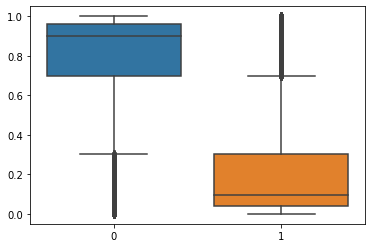

In [39]:
# temp
sns.boxplot(data=temp)

In [40]:
log_reg_ytest = log_reg.predict(original_Xtest)

Confusion matrix, without normalization
[[47747  9116]
 [    6    92]]
Normalized confusion matrix
[[0.83968486 0.16031514]
 [0.06122449 0.93877551]]


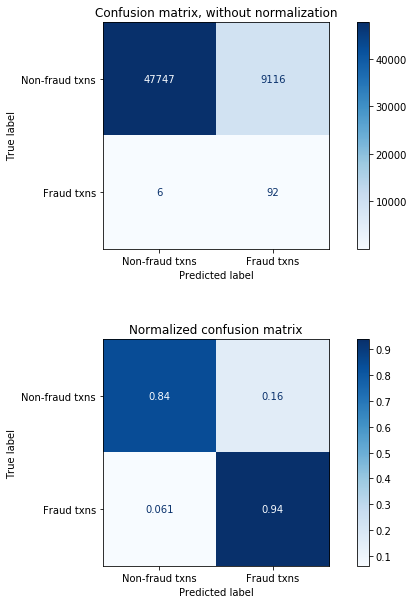

In [69]:
# Plot non-normalized & normalized confusion matrix
fig,ax = plt.subplots(2, 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.4)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
counter = 0
for title, normalize in titles_options:
    disp = plot_confusion_matrix(log_reg, original_Xtest, original_ytest,
                                 display_labels=['Non-fraud txns', 'Fraud txns'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                                 ax = ax[counter])
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    counter = counter+1
plt.show();

In [75]:
print('-'*40)
print('Precision score {0}'.format(precision_score(original_ytest, log_reg_ytest)))
print('Recall score {0}'.format(recall_score(original_ytest, log_reg_ytest)))
print('F1 score {0}'.format(f1_score(original_ytest, log_reg_ytest)))
print('AUCROC score {0}'.format(roc_auc_score(original_ytest, log_reg_ytest)))
print('-'*40)

----------------------------------------
Precision score 0.00999131190269331
Recall score 0.9387755102040817
F1 score 0.01977218998495594
AUCROC score 0.8892301833946037
----------------------------------------
